<a href="https://colab.research.google.com/github/RajeshwariKarthikeyan/Rank-Features-of-Smartphone/blob/main/Rank_Features_of_Smartphone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import os

In [ ]:
import plotly.offline as pyo
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df = pd.DataFrame(df)
df.head(11)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


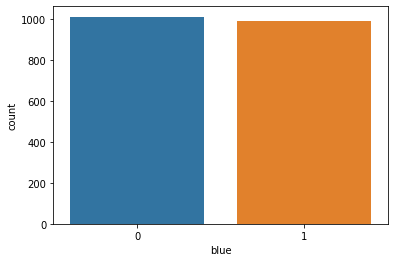

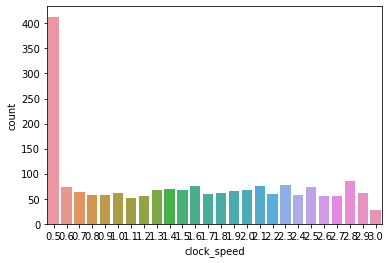

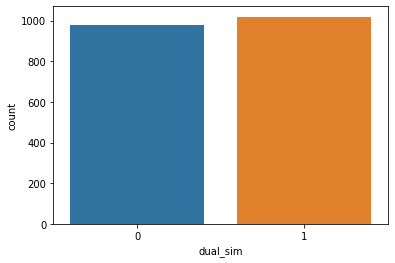

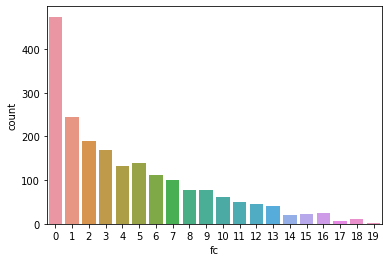

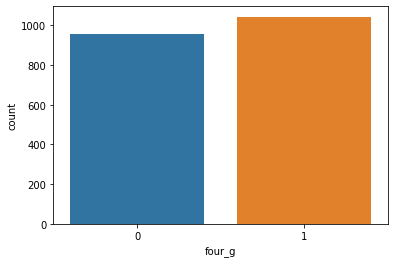

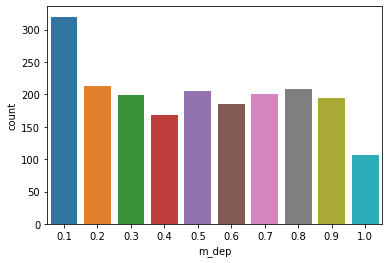

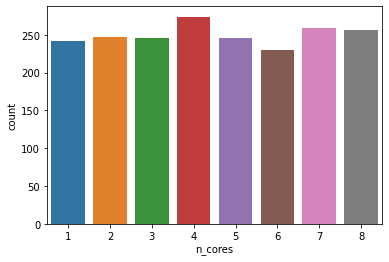

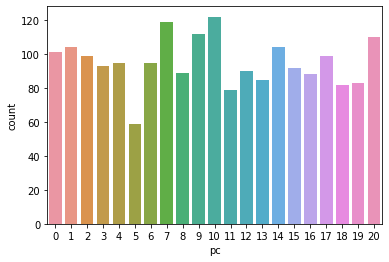

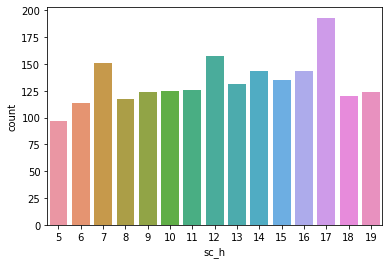

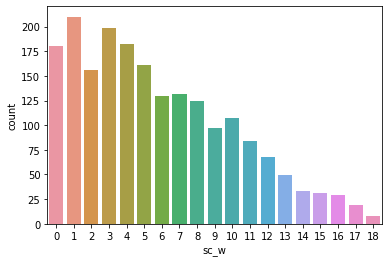

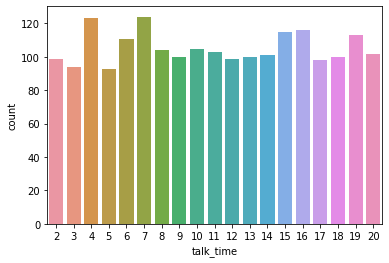

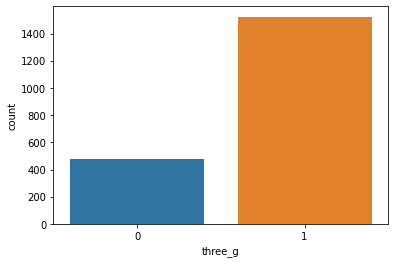

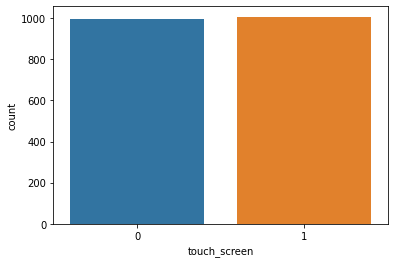

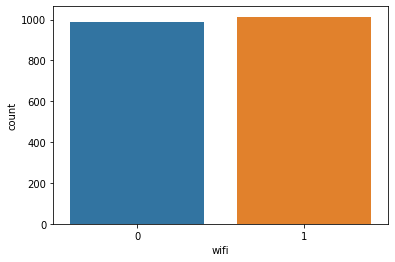

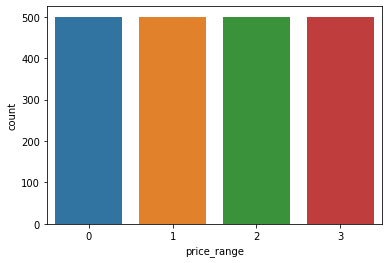

In [ ]:
for i in df:
    if(df[i].nunique()<30):
        sns.countplot(x=df[i])
        plt.show()

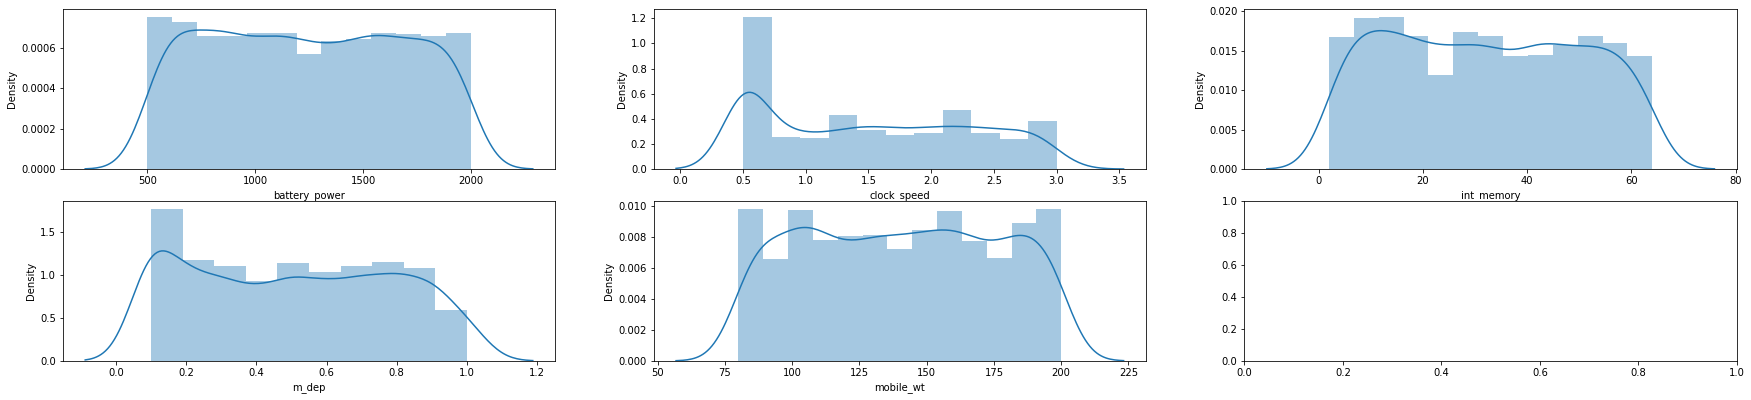

In [ ]:
plt.figure(figsize = (30,10))
plt.subplot(331)
sns.distplot(df['battery_power'])
plt.subplot(332)
sns.distplot(df['clock_speed'])
plt.subplot(333)
sns.distplot(df['int_memory'])
plt.subplot(334)
sns.distplot(df['m_dep'])
plt.subplot(335)
sns.distplot(df['mobile_wt'])
plt.subplot(336)

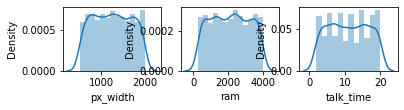

In [ ]:
sns.distplot(df['px_height'])
plt.subplot(337)
sns.distplot(df['px_width'])
plt.subplot(338)
sns.distplot(df['ram'])
plt.subplot(339)
sns.distplot(df['talk_time'])
plt.show()

In [ ]:
df["is_bluetooth"]=''
for i in range(len(df)):
    if df['blue'][i]==0:
        df['is_bluetooth'][i]='No'
    else:
        df['is_bluetooth'][i]='Yes'
px.pie(data_frame = df, names = 'is_bluetooth', title = 'Percentage of devices having bluetooth', hole= 0.2)


In [ ]:
df["is_DualSim"]=''
for i in range(len(df)):
    if df['dual_sim'][i]==0:
        df['is_DualSim'][i]='No'
    else:
        df['is_DualSim'][i]='Yes'
px.pie(data_frame = df, names = 'is_DualSim', title = 'Percentage of devices having dual sim', hole= 0.2)


In [ ]:
df["is_4G"]=''
for i in range(len(df)):
    if df['four_g'][i]==0:
        df['is_4G'][i]='No'
    else:
        df['is_4G'][i]='Yes'
px.pie(data_frame = df, names = 'is_4G', title = 'Percentage of devices having 4G connection', hole= 0.2)


In [ ]:
df["is_3G"]=''
for i in range(len(df)):
    if df['three_g'][i]==0:
        df['is_3G'][i]='No'
    else:
        df['is_3G'][i]='Yes'
px.pie(data_frame = df, names = 'is_3G', title = 'Percentage of devices having 3G connection', hole= 0.2)

In [ ]:
df["is_touchscreen"]=''
for i in range(len(df)):
    if df['touch_screen'][i]==0:
        df['is_touchscreen'][i]='No'
    else:
        df['is_touchscreen'][i]='Yes'
px.pie(data_frame = df, names = 'is_touchscreen', title = 'Percentage of devices having touch screen', hole= 0.2)

In [ ]:
df["is_wifi"]=''
for i in range(len(df)):
    if df['wifi'][i]==0:
        df['is_wifi'][i]='No'
    else:
        df['is_wifi'][i]='Yes'
px.pie(data_frame = df, names = 'is_wifi', title = 'Percentage of devices having Wifi', hole= 0.2)

In [ ]:
df["cores"]=''
for i in range(len(df)):
    if df['n_cores'][i]==1:
        df['cores'][i]='single core'
    elif df['n_cores'][i]==2:
        df['cores'][i]='dual core'
    elif df['n_cores'][i]==3:
        df['cores'][i]='triple core'
    elif df['n_cores'][i]==4:
        df['cores'][i]='quad core'
    elif df['n_cores'][i]==5:
        df['cores'][i]='penta core'
    elif df['n_cores'][i]==6:
        df['cores'][i]='hexa core'
    elif df['n_cores'][i]==7:
        df['cores'][i]='hepta core'
    else:
        df['cores'][i]='octa core'
px.pie(data_frame = df, names = 'cores', title = 'Percentage of devices having different types of cores', hole= 0.2)


In [ ]:
df1 = df.loc[:,['battery_power','blue','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','wifi','price_range']]
df1

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range
0,842,0,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,1,1
1,1021,1,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,2
4,1821,1,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0


In [ ]:
df2 = df.loc[:,['touch_screen','clock_speed']]
df2

,touch_screen,clock_speed
0,0,2.2
1,1,0.5
2,1,0.5
3,0,2.5
4,1,1.2
...,...,...
1995,1,0.5
1996,1,2.6
1997,1,0.9
1998,1,0.9


In [ ]:
df3 = pd.concat([df1, df2])
df3

,battery_power,blue,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,three_g,wifi,price_range,touch_screen,clock_speed
0,842.0,0.0,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,...,756.0,2549.0,9.0,7.0,19.0,0.0,1.0,1.0,NaN,NaN
1,1021.0,1.0,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,...,1988.0,2631.0,17.0,3.0,7.0,1.0,0.0,2.0,NaN,NaN
2,563.0,1.0,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,...,1716.0,2603.0,11.0,2.0,9.0,1.0,0.0,2.0,NaN,NaN
3,615.0,1.0,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,...,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,2.0,NaN,NaN
4,1821.0,1.0,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,...,1212.0,1411.0,8.0,2.0,15.0,1.0,0.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.5
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.6
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.9
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.9


In [ ]:
df["rank_by_price"] = df["price_range"].rank()
dt1 = df
dt1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1,No,No,No,No,No,Yes,dual core,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,2,Yes,Yes,Yes,Yes,Yes,No,triple core,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,2,Yes,Yes,Yes,Yes,Yes,No,penta core,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,2,Yes,No,No,Yes,No,No,hexa core,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,1,Yes,No,Yes,Yes,Yes,No,dual core,750.5


In [ ]:
dt1["rank_by_price"] = dt1["rank_by_price"].sort_values()
dt1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1,No,No,No,No,No,Yes,dual core,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,2,Yes,Yes,Yes,Yes,Yes,No,triple core,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,2,Yes,Yes,Yes,Yes,Yes,No,penta core,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,2,Yes,No,No,Yes,No,No,hexa core,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,1,Yes,No,Yes,Yes,Yes,No,dual core,750.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,0,0,Yes,Yes,Yes,Yes,Yes,No,hexa core,250.5
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1,2,Yes,Yes,No,Yes,Yes,Yes,quad core,1250.5
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,0,3,No,Yes,Yes,Yes,Yes,No,octa core,1750.5
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,1,0,No,No,Yes,Yes,Yes,Yes,penta core,250.5


In [ ]:
dt1.sort_values(by=["rank_by_price"])

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
1838,720,1,0.9,1,12,1,14,0.8,165,4,...,0,0,Yes,Yes,Yes,Yes,Yes,No,quad core,250.5
1762,808,1,0.5,1,3,0,46,0.5,105,8,...,1,0,Yes,Yes,No,Yes,No,Yes,octa core,250.5
419,914,1,0.9,0,2,0,4,0.8,100,2,...,0,0,Yes,No,No,Yes,Yes,No,dual core,250.5
846,1489,0,2.4,1,8,0,32,0.6,200,1,...,0,0,No,Yes,No,No,No,No,single core,250.5
845,1907,0,2.0,0,13,0,55,0.9,105,7,...,1,0,No,No,No,Yes,No,Yes,hepta core,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1046,1,2.8,1,0,1,58,0.2,100,8,...,1,3,Yes,Yes,Yes,Yes,Yes,Yes,octa core,1750.5
982,1035,0,0.6,1,2,1,44,0.5,99,3,...,0,3,No,Yes,Yes,Yes,Yes,No,triple core,1750.5
987,1688,0,2.5,0,0,1,21,0.2,170,7,...,1,3,No,No,Yes,Yes,Yes,Yes,hepta core,1750.5
956,862,0,2.3,0,9,1,6,0.1,107,8,...,1,3,No,No,Yes,Yes,Yes,Yes,octa core,1750.5


In [ ]:
dt1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,wifi,price_range,is_bluetooth,is_DualSim,is_4G,is_3G,is_touchscreen,is_wifi,cores,rank_by_price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1,1,No,No,No,No,No,Yes,dual core,750.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,0,2,Yes,Yes,Yes,Yes,Yes,No,triple core,1250.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,0,2,Yes,Yes,Yes,Yes,Yes,No,penta core,1250.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,0,2,Yes,No,No,Yes,No,No,hexa core,1250.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,0,1,Yes,No,Yes,Yes,Yes,No,dual core,750.5


In [ ]:
dt2 = pd.read_csv(r"/content/train.csv")
RankedDataset1 = dt2.rank()
RankedDataset1.sort_values(by="price_range")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1838,320.5,1505.5,638.5,1491.0,1853.0,1479.0,432.0,1595.5,1414.5,872.5,...,657.5,978.0,445.5,1214.0,1284.5,146.5,1239.0,1497.5,493.5,250.5
1762,435.5,1505.5,207.0,1491.0,993.5,479.0,1451.5,1003.0,436.0,1872.5,...,189.0,45.0,442.0,1353.0,1008.0,901.0,1239.0,497.5,1493.5,250.5
419,589.0,1505.5,638.5,491.0,814.0,479.0,77.5,1595.5,325.5,366.0,...,329.5,1341.0,306.0,791.5,1284.5,363.0,1239.0,1497.5,493.5,250.5
846,1323.5,505.5,1612.5,1491.0,1601.0,479.0,1011.0,1198.5,1991.0,121.5,...,288.0,408.0,292.0,287.0,1153.5,696.5,239.0,497.5,493.5,250.5
845,1875.0,505.5,1337.0,491.0,1895.5,479.0,1727.0,1797.0,436.0,1615.0,...,1231.5,1363.0,16.0,1214.0,836.5,1636.5,1239.0,497.5,1493.5,250.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,753.0,1505.5,1868.0,1491.0,237.5,1479.0,1828.5,427.0,325.5,1872.5,...,455.0,728.0,1919.0,1660.0,1797.5,798.5,1239.0,1497.5,1493.5,1750.5
982,737.5,505.5,450.5,1491.0,814.0,1479.0,1382.0,1003.0,309.0,612.5,...,419.5,1937.0,1732.0,1214.0,1008.0,1106.0,1239.0,1497.5,493.5,1750.5
987,1583.0,505.5,1678.5,491.0,237.5,1479.0,669.5,427.0,1496.0,1615.0,...,1134.0,481.5,1994.0,1660.0,1897.0,696.5,1239.0,1497.5,1493.5,1750.5
956,515.5,505.5,1544.5,491.0,1678.5,1479.0,142.0,160.5,472.5,1872.5,...,1371.0,1966.0,1703.5,541.5,836.5,798.5,1239.0,1497.5,1493.5,1750.5


In [ ]:
b = dt2
b["rank_by_price"] = b["price_range"].rank()
b["rank_by_battery"] = b["battery_power"].rank(ascending=False)
b["rank_by_blueooth"] = b["blue"].rank(ascending=False)
b["rank_by_clockspeed"] = b["clock_speed"].rank(ascending=False)
b["rank_by_DualSIM"] = b["dual_sim"].rank(ascending=False)
b["rank_by_fc"] = b["fc"].rank(ascending=False)
b["rank_by_4G"] = b["four_g"].rank(ascending=False)
b["rank_by_InternalMemory"] = b["int_memory"].rank(ascending=False)
b["rank_by_mdep"] = b["m_dep"].rank(ascending=False)
b["rank_by_weight"] = b["mobile_wt"].rank(ascending=True)
b["rank_by_ncores"] = b["n_cores"].rank(ascending=False)
b["rank_by_pc"] = b["pc"].rank(ascending=False)
b["rank_by_height"] = b["px_height"].rank(ascending=False)
b["rank_by_width"] = b["px_width"].rank(ascending=False)
b["rank_by_ram"] = b["ram"].rank(ascending=False)
b["rank_by_sch"] = b["sc_h"].rank(ascending=False)
b["rank_by_scw"] = b["sc_w"].rank(ascending=False)
b["rank_by_talktime"] = b["talk_time"].rank(ascending=False)
b["rank_by_3G"] = b["three_g"].rank(ascending=False)
b["rank_by_touchscreen"] = b["touch_screen"].rank(ascending=False)
b["rank_by_wifi"] = b["wifi"].rank(ascending=False)
b.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5


In [ ]:
RankedDataset2 = b.iloc[:,21:]
RankedDataset2

,rank_by_price,rank_by_battery,rank_by_blueooth,rank_by_clockspeed,rank_by_DualSIM,rank_by_fc,rank_by_4G,rank_by_InternalMemory,rank_by_mdep,rank_by_weight,...,rank_by_pc,rank_by_height,rank_by_width,rank_by_ram,rank_by_sch,rank_by_scw,rank_by_talktime,rank_by_3G,rank_by_touchscreen,rank_by_wifi
0,750.5,1512.5,1495.5,525.0,1510.0,1404.0,1522.0,1820.5,802.5,1783.5,...,1746.0,1972.5,1664.5,762.5,1459.5,716.5,159.0,1762.0,1503.5,507.5
1,1250.5,1278.5,495.5,1794.0,510.0,1763.5,522.0,334.5,609.5,932.5,...,1402.0,545.5,17.0,714.0,341.0,1355.0,1418.5,762.0,503.5,1507.5
2,1250.5,1909.5,495.5,1794.0,510.0,1187.0,522.0,720.0,204.0,1069.0,...,1402.0,212.0,386.5,732.0,1209.5,1532.5,1202.5,762.0,503.5,1507.5
3,1250.5,1830.0,495.5,322.5,1510.0,1763.5,1522.0,1710.5,405.5,846.0,...,1090.5,250.0,287.0,639.0,509.0,588.0,996.0,762.0,1503.5,1507.5
4,750.5,242.0,495.5,1193.5,1510.0,105.5,522.0,619.0,802.5,1006.0,...,606.5,261.5,1054.0,1375.0,1580.0,1532.5,587.0,762.0,503.5,1507.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,250.5,1587.5,495.5,1794.0,510.0,1763.5,522.0,1979.5,405.5,456.0,...,606.5,244.5,163.0,1767.0,924.0,1164.5,159.0,762.0,503.5,1507.5
1996,1250.5,58.0,495.5,258.0,510.0,1763.5,1522.0,784.5,1574.0,1766.5,...,1650.0,536.0,54.5,1062.0,1209.5,375.0,471.5,762.0,503.5,507.5
1997,1750.5,121.5,1495.5,1362.5,510.0,1404.0,522.0,860.0,609.5,486.5,...,1650.0,583.5,502.0,504.0,1459.5,1715.5,1638.0,762.0,503.5,1507.5
1998,250.5,648.0,1495.5,1362.5,1510.0,856.0,522.0,549.5,1840.5,1069.0,...,1479.0,1395.5,1792.5,1664.5,184.5,375.0,159.0,762.0,503.5,507.5


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn


In [ ]:
df = pd.read_csv(r"/content/train.csv")

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)

In [ ]:
log=LogisticRegression()
log.fit(x_train,y_train)
print("Training score of LogisticRegression is: {}".format(log.score(x_train,y_train)*100))
y_predlog=log.predict(x_test)
print(y_predlog)
acrr=accuracy_score(y_test,y_predlog)*100
print("Accuracy of Logistic Regression Classifier is: {}%".format(acrr))
print("Confusion matrix Logistic Regression Classifier is: \n{}".format(confusion_matrix(y_test,y_predlog)))
print("{}".format(classification_report(y_test,y_predlog)))

Training score of LogisticRegression is: 97.93333333333332
[3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 1 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 2 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 2 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 3 0 3 3 0 2 2 1 0 2 2 1 3 2 

In [ ]:
df = pd.read_csv('/content/train.csv')
X = df.iloc[:, [1, 2, 3]].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
print("Accuracy of KNN Classifier is: {}".format(ac))
print("Confusion matrix of KNN is:{}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Accuracy of KNN Classifier is: 0.2225
Confusion matrix of KNN is:[[37 22 19 17]
 [40 19 21 12]
 [41 19 17 22]
 [50 33 15 16]]
              precision    recall  f1-score   support

           0       0.22      0.39      0.28        95
           1       0.20      0.21      0.21        92
           2       0.24      0.17      0.20        99
           3       0.24      0.14      0.18       114

    accuracy                           0.22       400
   macro avg       0.22      0.23      0.22       400
weighted avg       0.23      0.22      0.21       400



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.8


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
df = pd.read_csv(r"/content/train.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
from sklearn.svm import SVC
svm=SVC(kernel='rbf')
svm.fit(x_train,y_train)
print("Training score of SVM is: {}".format(svm.score(x_train,y_train)*100))
y_pred_svm=svm.predict(x_test)
ac_svm=accuracy_score(y_test,y_pred_svm)*100
print("Accuracy of SVM is: {}".format(ac_svm))
print("Confusion matrix of SVM is: {}".format(confusion_matrix(y_test,y_pred_svm)))
print("{}".format(classification_report(y_test,y_pred_svm)))

Training score of SVM is: 98.06666666666666
Accuracy of SVM is: 89.0
Confusion matrix of SVM is: [[118   6   0   0]
 [  6  96   8   0]
 [  0  15 106   4]
 [  0   0  16 125]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       124
           1       0.82      0.87      0.85       110
           2       0.82      0.85      0.83       125
           3       0.97      0.89      0.93       141

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
df = pd.read_csv(r"/content/train.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print("Training score of GaussianNB is {}".format(nb.score(x_train,y_train)*100))
y_pred=nb.predict(x_test)
ac_nb=accuracy_score(y_test,y_pred)*100
print("Accuracy of Naive Bayes Classifier is: {}".format(ac_nb))
print("Confusion matrix of Naive Bayes Classifier is:{}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Training score of GaussianNB is 81.39999999999999
Accuracy of Naive Bayes Classifier is: 84.39999999999999
Confusion matrix of Naive Bayes Classifier is:[[117   7   0   0]
 [  6  83  21   0]
 [  0  22  92  11]
 [  0   0  11 130]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       124
           1       0.74      0.75      0.75       110
           2       0.74      0.74      0.74       125
           3       0.92      0.92      0.92       141

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
df = pd.read_csv(r"/content/train.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion = "entropy")
DT.fit(x_train,y_train)
print("Training score of DecisionTreeClassifier is: {}".format(DT.score(x_train,y_train)*100))
y_pred_DT=DT.predict(x_test)
ac_DT=accuracy_score(y_test,y_pred_DT)*100
print("Accuracy of Decision Tree Classifier is: {}".format(ac_DT))
print("Confusion matrix of Decision Tree Classifier is: {}".format(confusion_matrix(y_test,y_pred_DT)))
print("{}".format(classification_report(y_test,y_pred_DT)))

Training score of DecisionTreeClassifier is: 100.0
Accuracy of Decision Tree Classifier is: 86.2
Confusion matrix of Decision Tree Classifier is: [[113  11   0   0]
 [ 11  90   9   0]
 [  0  13 100  12]
 [  0   0  13 128]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       124
           1       0.79      0.82      0.80       110
           2       0.82      0.80      0.81       125
           3       0.91      0.91      0.91       141

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
df = pd.read_csv(r"/content/train.csv")
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=300)
RF.fit(x_train,y_train)
print("Training score of Random Forest Classifier is: {}".format(RF.score(x_train,y_train)*100))
y_pred_RF=RF.predict(x_test)
ac_RF=accuracy_score(y_test,y_pred_RF)*100
print("Accuracy of Random Forest Classifier is: {}".format(ac_RF))
print("Confusion matrix of Random Forest Classifier is: {}".format(confusion_matrix(y_test,y_pred_RF)))
print("{}".format(classification_report(y_test,y_pred_RF)))

Training score of Random Forest Classifier is: 100.0
Accuracy of Random Forest Classifier is: 88.4
Confusion matrix of Random Forest Classifier is: [[121   3   0   0]
 [  5  91  14   0]
 [  0  16  99  10]
 [  0   0  10 131]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       124
           1       0.83      0.83      0.83       110
           2       0.80      0.79      0.80       125
           3       0.93      0.93      0.93       141

    accuracy                           0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
df = pd.read_csv('/content/train.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#X = df.iloc[:, [2, 3]].values
#y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)*100
print("Accuracy of KNN is: {}".format(ac))
print("Confusion matrix of KNN is: {}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Accuracy of KNN is: 51.800000000000004
Confusion matrix of KNN is: [[81 37  6  0]
 [35 52 18  5]
 [12 42 52 19]
 [ 1  9 57 74]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       124
           1       0.37      0.47      0.42       110
           2       0.39      0.42      0.40       125
           3       0.76      0.52      0.62       141

    accuracy                           0.52       500
   macro avg       0.54      0.52      0.52       500
weighted avg       0.55      0.52      0.53       500



In [ ]:
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
df = pd.read_csv('/content/train.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=1)
model = Perceptron()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
ac = accuracy_score(y_test,y_pred)*100
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy of Perceptron : %.3f (%.3f)' % (mean(scores)*100, std(scores)))
print("Confusion matrix of KNN is: {}".format(confusion_matrix(y_test,y_pred)))
print("{}".format(classification_report(y_test,y_pred)))

Accuracy of Perceptron : 84.700 (0.052)
Confusion matrix of KNN is: [[81 37  6  0]
 [35 52 18  5]
 [12 42 52 19]
 [ 1  9 57 74]]
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       124
           1       0.37      0.47      0.42       110
           2       0.39      0.42      0.40       125
           3       0.76      0.52      0.62       141

    accuracy                           0.52       500
   macro avg       0.54      0.52      0.52       500
weighted avg       0.55      0.52      0.53       500



In [ ]:
classifiers=["Perceptron","LogisticRegression","GaussianNB","SVM","DecisionTreeClassifier","RandomForestClassifier","KNN"]
accuracy_=[ac,acrr,ac_nb,ac_svm,ac_DT,ac_RF,ac]
df_ac=pd.DataFrame({'model':classifiers,"accuracy":accuracy_})
px.histogram(data_frame=df_ac,x="model",y="accuracy")

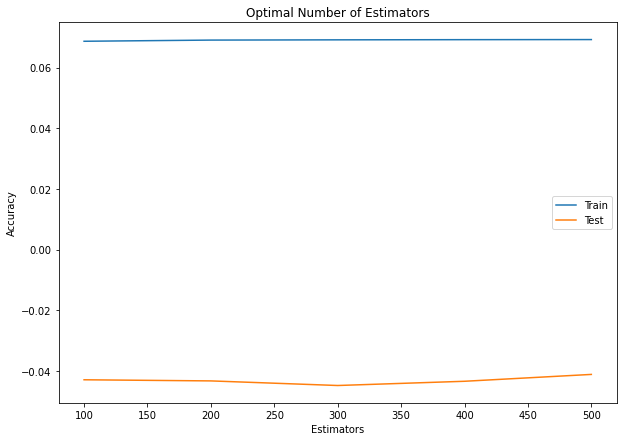

   n_neighbors  train_accuracy  test_accuracy
0          100        0.068663      -0.042944
1          200        0.069051      -0.043316
2          300        0.069134      -0.044832
3          400        0.069191      -0.043437
4          500        0.069221      -0.041176


In [ ]:
from sklearn.ensemble import RandomForestRegressor
train_accuracy=[]
test_accuracy=[]
for i in range(100,600,100):
    c=RandomForestRegressor(n_estimators=i)
    c.fit(x_train,y_train)
    train_accuracy.append(c.score(x_train,y_train))
    test_accuracy.append(c.score(x_test,y_test))
frame=pd.DataFrame({"n_neighbors":range(100,600,100),"train_accuracy":train_accuracy,"test_accuracy":test_accuracy})
frame
plt.figure(figsize=(10,7))
plt.plot(range(100,600,100),frame["train_accuracy"],label="Train")
plt.plot(range(100,600,100),frame["test_accuracy"],label="Test")
plt.title("Optimal Number of Estimators")
plt.xlabel("Estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(frame)

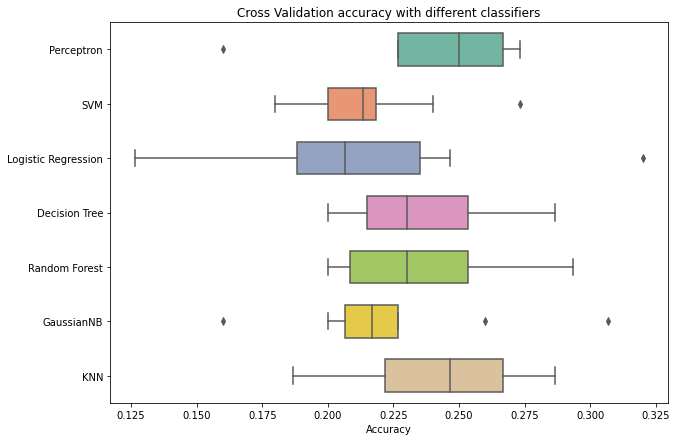

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 10)
xyz = []
accuracy = []

classifiers=["Perceptron","SVM","Logistic Regression","Decision Tree","Random Forest","GaussianNB","KNN"]
models=[Perceptron(),SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=300,random_state=0),GaussianNB(),KNeighborsClassifier()]

for i in models:
    model = i
    cv_result=cross_val_score(model,x_train,y_train,cv=kfold,scoring="accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
    
cv_models_datafeame= pd.DataFrame(xyz, index = classifiers)
cv_models_datafeame.columns = ['CV Mean']
cv_models_datafeame
cv_models_datafeame.sort_values(['CV Mean'], ascending =[0])

box = pd.DataFrame(accuracy, index = [classifiers])
boxT = box.T
plt.figure(figsize = (10,7))
ax = sns.boxplot(data = boxT, orient = "h", palette = "Set2", width = 0.6)
ax.set_yticklabels(classifiers)
ax.set_title('Cross Validation accuracy with different classifiers')
ax.set_xlabel('Accuracy')
plt.show()